In [1]:
#importing ibraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(420, 849, 3)
(800, 1500, 3)


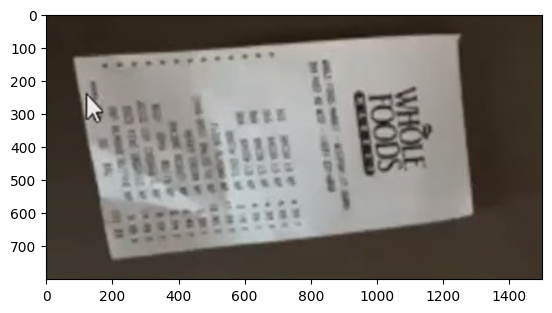

In [2]:
im_path="./bill.jpg"
img=cv2.imread(im_path)
print(img.shape)
#Resize
img=cv2.resize(img,(1500,800))
print(img.shape)
#BGR format :BGR -> RGB
plt.imshow(img)

* Remove the noise
* Edge detection
* Contour EXtract
* Best Countor Selection
* Project to the screen

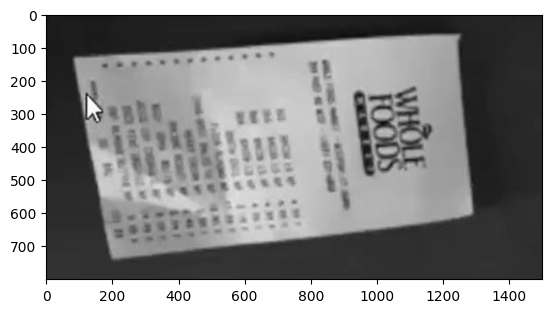

In [3]:
## image blur
orig = img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.show()
blurred =cv2.GaussianBlur(gray,(5,5),0)

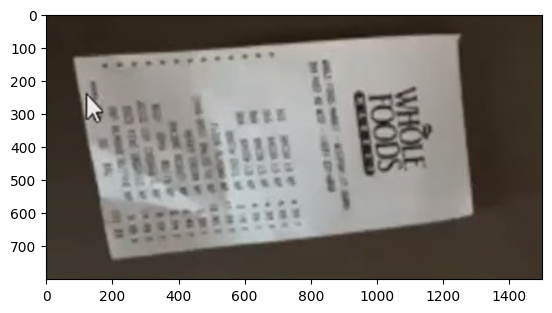

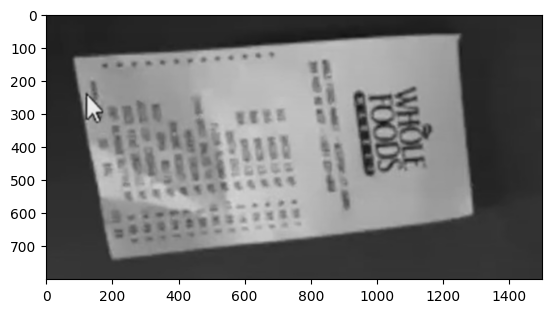

In [4]:
regen =cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(img) #old image
plt.show()
plt.imshow(regen)
plt.show() #regen image

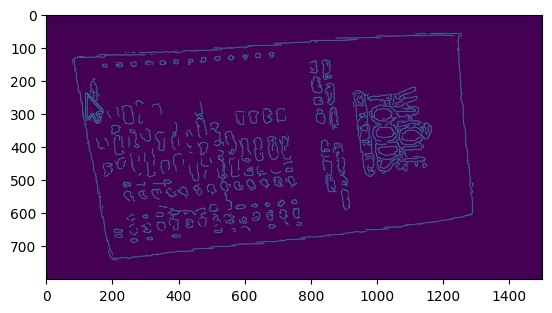

In [5]:
#Edge Detection
edge =cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.show()

In [6]:
edge.shape

(800, 1500)

In [7]:
#Countours Extraction
contours,_ = cv2.findContours(edge,cv2.RETR_LIST ,cv2.CHAIN_APPROX_NONE)

print(len(contours))

contours = sorted(contours, reverse=True, key=cv2.contourArea)


1297


In [8]:
#Select best contours
for c in contours:
    p=cv2.arcLength(c,True)
    approx =cv2.approxPolyDP(c,0.01*p,True)

    if len(approx)==4:
        target=approx
        break
print(target.shape)

(4, 1, 2)


In [9]:
## reorder contours
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    hnew =np.zeros((4,2),dtype =np.float32)
    add = h.sum(axis=1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]

    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [10]:
reorder= reorder(target)
print("----------------")
print(reorder)

[[160 543]
 [168 609]
 [194 713]
 [168 609]]
----------------
[[194. 713.]
 [194. 713.]
 [194. 713.]
 [194. 713.]]


In [11]:
# project to a fixed screen

input_representation = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])


In [12]:
M = cv2.getPerspectiveTransform(input_representation, output_map)
ans=cv2.warpPerspective(orig, M, (800, 800))

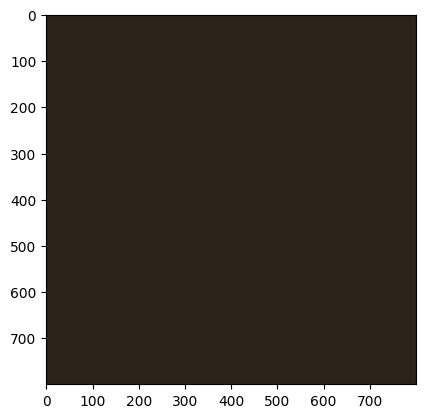

In [13]:
plt.imshow(ans)
plt.show()

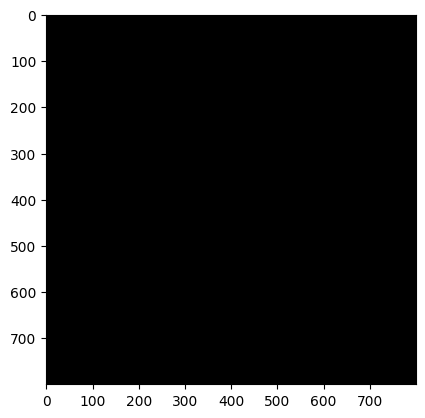

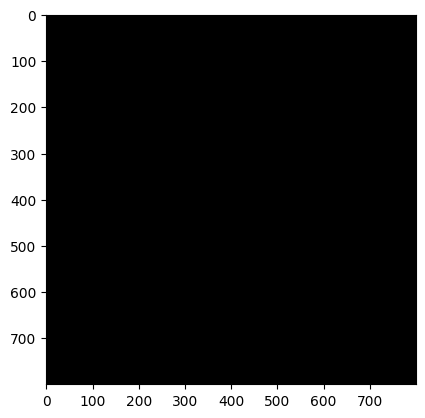

In [14]:
res=cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
plt.imshow(res,cmap="gray")
plt.show()
b_res =cv2.GaussianBlur(res,(3,3),0)
plt.imshow(b_res,cmap="gray")
plt.show()
